<a href="https://colab.research.google.com/github/egahqusayf/Linear-Regression-Analysis-of-Rice-Production-in-Indonesia-2023/blob/main/notebooks/rice_production_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

Load Dataset from GitHub

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/egahqusayf/Linear-Regression-Analysis-of-Rice-Production-in-Indonesia-2023/main/data/rice_production_indonesia_2023.csv"
df = pd.read_csv(url)

df.head()

,province,harvested_area_ha,yield_ku_per_ha,rice_production_tons
0,ACEH,254287.38,55.22,1404234.82
1,SUMATERA UTARA,406109.49,51.40,2087474.15
2,SUMATERA BARAT,300564.77,49.32,1482468.79
3,RIAU,51914.14,39.68,205972.55
4,JAMBI,61236.64,45.06,275941.45


Exploratory Data Analysis (EDA)

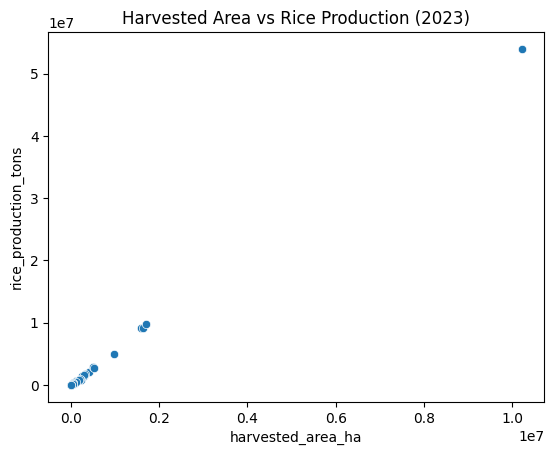

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x="harvested_area_ha",
    y="rice_production_tons",
    data=df
)
plt.title("Harvested Area vs Rice Production (2023)")
plt.show()

Train-test split and linear regression modeling

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['harvested_area_ha']]
y = df['rice_production_tons']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Model evaluation using MAE, RMSE, and R2

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))


MAE : 66269.33309627147
RMSE: 106380.69479168831
R2  : 0.9952613988198721


Visualization and asset generation

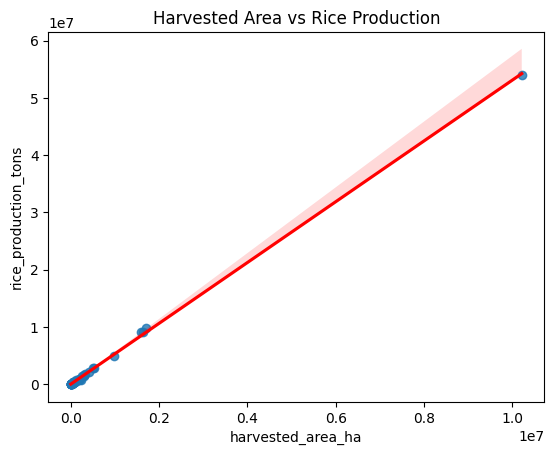

In [9]:
# Scatter + Regression
sns.regplot(
    x="harvested_area_ha",
    y="rice_production_tons",
    data=df,
    line_kws={"color": "red"}
)
plt.title("Harvested Area vs Rice Production")
plt.savefig("scatter_regression.png", dpi=300)
plt.show()


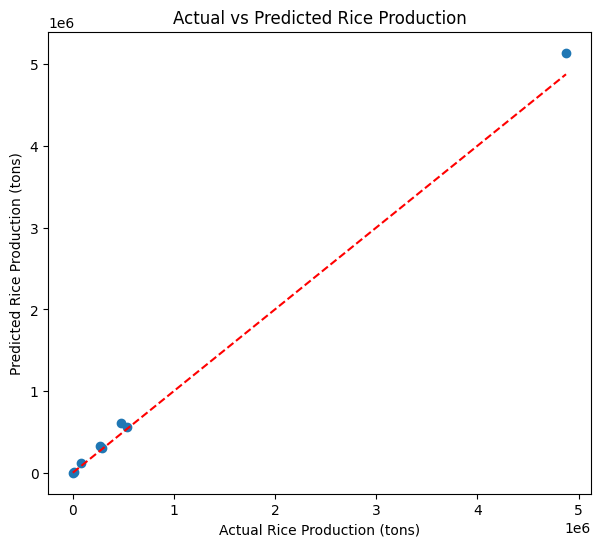

In [12]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred)

# Garis ideal (y = x)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)

plt.xlabel("Actual Rice Production (tons)")
plt.ylabel("Predicted Rice Production (tons)")
plt.title("Actual vs Predicted Rice Production")

plt.savefig("actual_vs_predicted.png", dpi=300, bbox_inches="tight")
plt.show()


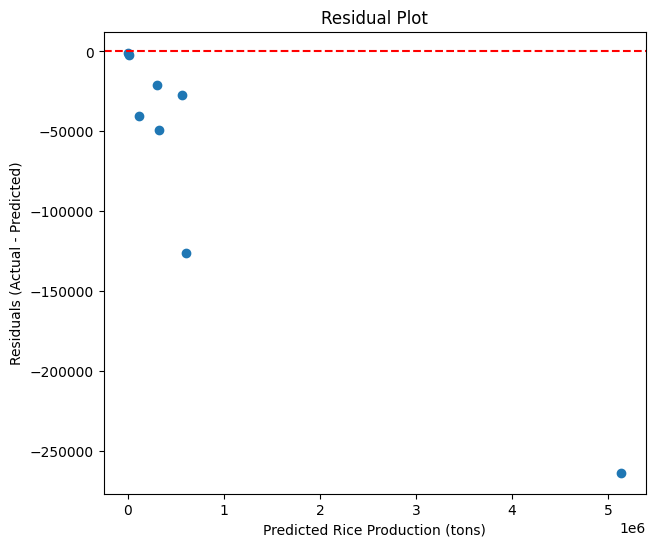

In [13]:
# Hitung residual
residuals = y_test - y_pred

plt.figure(figsize=(7,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Rice Production (tons)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")

plt.savefig("residual_plot.png", dpi=300, bbox_inches="tight")
plt.show()
